In [2]:
import cv2
import glob
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
from utils.compute_iou import compute_ious
from main import segment_fish

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
data_root = osp.join("dataset", "train", "imgs")
img_paths = glob.glob(osp.join(data_root, "*.jpg"))
len(img_paths)

5

(600, 600) 0.891400461557148


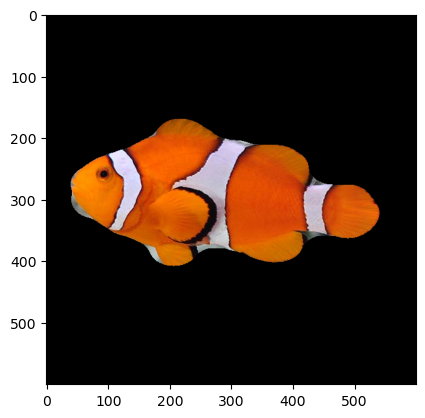

(450, 600) 0.8853340403765575


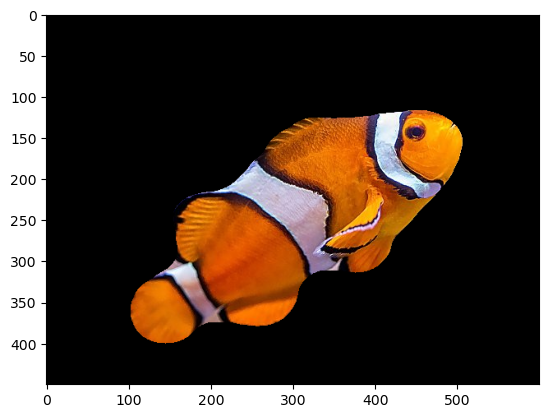

(436, 640) 0.8265361995442985


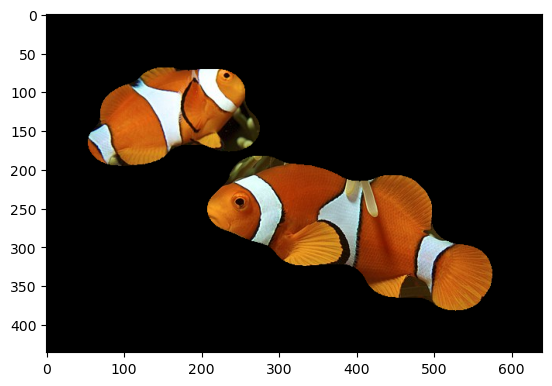

(793, 1200) 0.8056248866332892


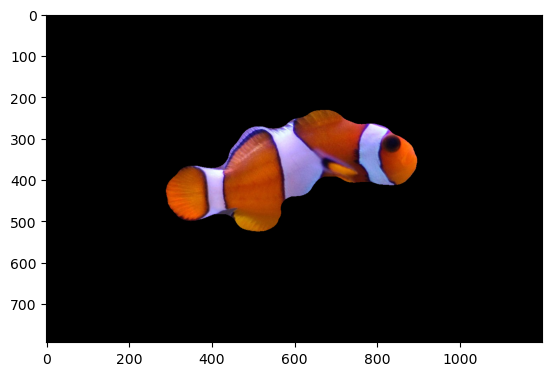

(845, 1200) 0.8041670496731872


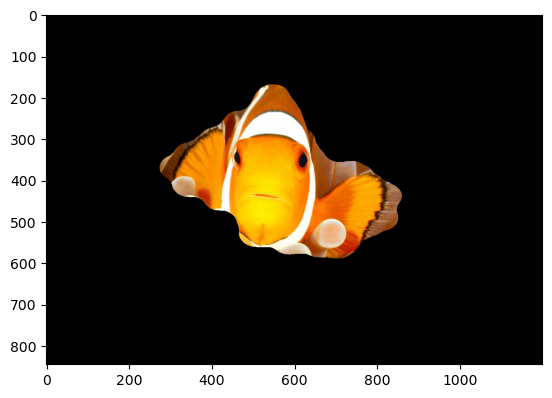

0.8426125275568961

In [5]:
masks = dict()
ious = []
for path in img_paths:
    img = cv2.imread(path)
    mask = segment_fish(img)
    masks[osp.basename(path)] = mask
    ious.append(compute_ious(masks, osp.join("dataset", "train", "masks")))
    print(mask.shape, compute_ious(masks, osp.join("dataset", "train", "masks")))
    img = np.where(mask[:,:,None], img, np.zeros_like(img))
    plt.imshow(img[:,:,::-1])
    plt.show()
np.mean(ious)